In [8]:
import numpy as np 
import matplotlib.pyplot as plt

from SpectralCorr import *

### 1. Generate AR1 timeseries. These are randomly generated and so they shouldn't be significantly correlated

In [9]:
N = 500               # number of time points
dt = 1.0              # time step = 1 month
fs = 1 / dt           # sampling frequenct = 1 / 1 month

# AR(1) parameters
rho_x = 0.9
rho_y = 0.9
noise_std = 1.0

# Preallocate arrays
ts1 = AR1_process(rho_x, noise_std, 1, N, seed = 42, dt = dt)
ts2 = AR1_process(rho_y, noise_std, 1, N, seed = 31, dt = dt)

ccf_maxlag = 36
ccf_ds = cross_correlation(ts1, ts2, maxlags=ccf_maxlag)
lag_max, ccf_max = cross_correlation_maxima(ts1, ts2, maxlags=ccf_maxlag)

/var/folders/xc/1pgd3mgn7qjdv8bmcggt31j40000gn/T/ipykernel_81938/4099375387.py:16: DeprecationWarning: cross_correlation_maxima() is deprecated and will be removed in a future version. Use maximum_cross_correlation() instead.
  lag_max, ccf_max = cross_correlation_maxima(ts1, ts2, maxlags=ccf_maxlag)


### 2. Visualize the lagged AR(1) time series

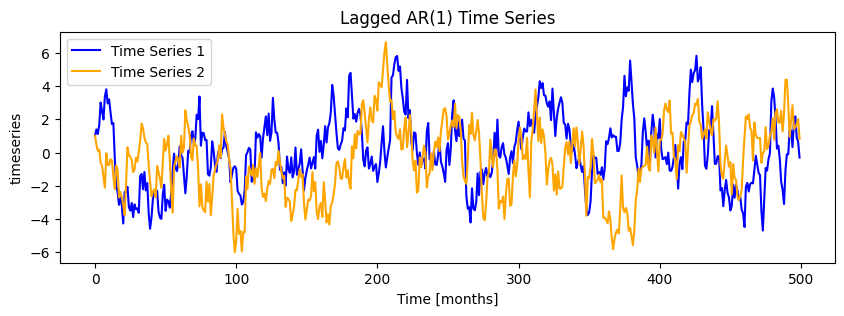

In [10]:
fig, axes = plt.subplots(figsize=(10, 3))
ts1.plot(ax = axes, label='Time Series 1', color='blue')
ts2.plot(ax = axes, label='Time Series 2', color='orange')
axes.set_title('Lagged AR(1) Time Series')
axes.set_xlabel('Time [months]')
axes.legend()

### 3. Visualize and check correlation significance using Pearson and Ebisuzaki methods

Computing cross-correlation: 100%|██████████| 73/73 [00:06<00:00, 10.61it/s]


AttributeError: 'NoneType' object has no attribute 'tight_layout'

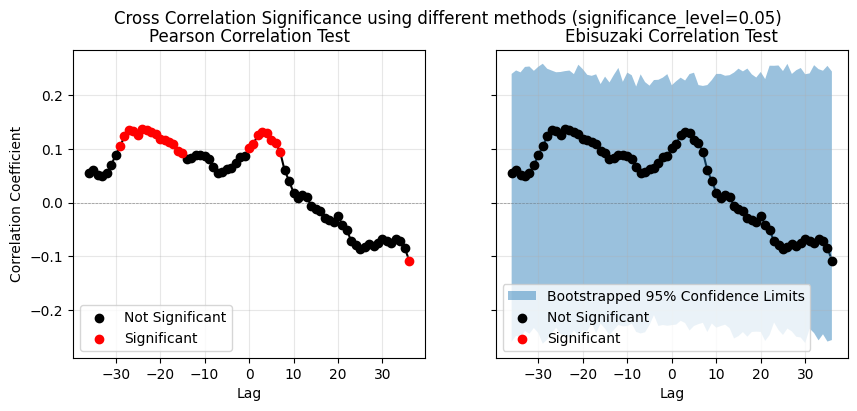

In [11]:
significance_level = 0.05  # significance level 

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

fig.suptitle(f'Cross Correlation Significance using different methods (significance_level={significance_level})')

#### GAUSSIAN CCF SIGNIFICANCE #####
axes[0].set_title("Pearson Correlation Test")
ccf_ds = cross_correlation(ts1, ts2, maxlags=ccf_maxlag, method='pearson')
fig, ax = plot_cross_correlation(ccf_ds, significance_level=significance_level, 
                               show_significance=True, show_confidence=False, ax=axes[0])

#### BOOTSTRAPPED (MONTE CARLO) CCF SIGNIFICANCE #####
axes[1].set_title("Ebisuzaki Correlation Test")
n_iter = 1000  # number of Monte Carlo Iterations 
bccf_ds = cross_correlation(ts1, ts2, maxlags=ccf_maxlag, method='ebisuzaki',
                            n_iter=n_iter, return_distributions=True, detrend=True)
fig, ax = plot_cross_correlation(bccf_ds, significance_level=significance_level, 
                               show_significance=True, show_confidence=True, ax=axes[1])

axes[1].set_ylabel("")

for a in axes:
    a.legend(loc="lower left")
    
fig.tight_layout()